# 1. Install and Import Dependencies

In [3]:
!pip3 install torch torchvision torchaudio

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
    --------------------------------------- 0.0/2.4 MB 245.8 kB/s eta 0:00:10
   - -------------------------------------- 0.1/2.4 MB 595.3 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/2.4 MB 888.4 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/2.4 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.4 MB 1.3 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.4 MB 1.4 MB/s eta 0:00:02
   ---------- ----------------------------- 0.7/2.4 MB 1.5 MB/s eta 0:00:02
   ------------ --------------------------- 0.8/2.4 MB 1.6 MB/s eta 0:00:02
   --------------- ------------------------ 0.9/2.4 MB 1.7 MB/s eta 0:00:01
   ----------------- -------------

In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [5]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\dilsh/.cache\torch\hub\ultralytics_yolov5_master


WARNING  Python>=3.10 is required, but Python==3.8.19 is currently installed 


YOLOv5  2024-11-19 Python-3.8.19 torch-1.8.1+cu111 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [3]:
img = "https://cdn.pixabay.com/photo/2021/11/20/05/15/car-6810885_1280.jpg"

In [4]:
results = model(img)
results.print()

image 1/1: 853x1280 7 persons, 1 bicycle, 19 cars, 1 truck, 1 traffic light
Speed: 220.5ms pre-process, 302.5ms inference, 26.9ms NMS per image at shape (1, 3, 448, 640)


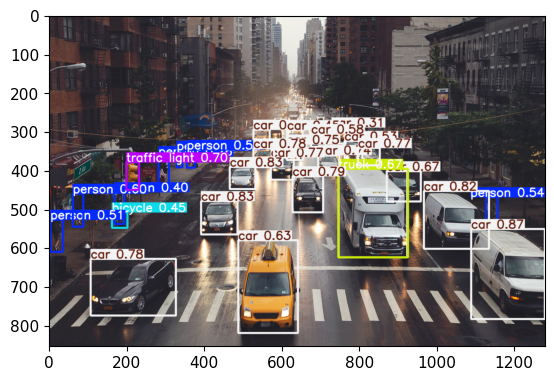

In [5]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [6]:
results.render()

[array([[[46, 41, 45],
         [56, 47, 52],
         [61, 48, 55],
         ...,
         [50, 47, 54],
         [51, 48, 55],
         [52, 49, 56]],
 
        [[46, 41, 45],
         [57, 48, 53],
         [60, 47, 54],
         ...,
         [56, 53, 60],
         [57, 54, 61],
         [58, 55, 62]],
 
        [[45, 40, 44],
         [58, 49, 54],
         [63, 48, 55],
         ...,
         [58, 55, 62],
         [58, 55, 62],
         [58, 55, 62]],
 
        ...,
 
        [[41, 38, 45],
         [41, 38, 45],
         [41, 38, 45],
         ...,
         [42, 41, 49],
         [43, 42, 50],
         [43, 42, 50]],
 
        [[42, 39, 46],
         [42, 39, 46],
         [41, 38, 45],
         ...,
         [42, 41, 49],
         [43, 42, 50],
         [44, 43, 51]],
 
        [[43, 40, 47],
         [42, 39, 46],
         [41, 38, 45],
         ...,
         [41, 40, 48],
         [43, 42, 50],
         [44, 43, 51]]], dtype=uint8)]

# 4. Real Time Detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [7]:
import uuid   # Unique identifier
import os
import time

In [12]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     ---------------------------------------- 0.0/3.1 GB ? eta -:--:--
     ---------------------------------------- 0.0/3.1 GB ? eta -:--:--
     ---------------------------------------- 0.0/3.1 GB ? eta -:--:--
     ---------------------------------------- 0.0/3.1 GB ? eta -:--:--
     ---------------------------------------- 0.0/3.1 GB 238.1 kB/s eta 3:33:52
     ---------------------------------------- 0.0/3.1 GB 238.1 kB/s eta 3:33:52
     ---------------------------------------- 0.0/3.1 GB 238.1 kB/s eta 3:33:52
     ---------------------------------------- 0.0/3.1 GB 238.1 kB/s eta 3:33:52
     ---------------------------------------- 0.0/3.1 GB 327.7 kB/s eta 2:35:25
     ---------------------------------------- 0.0/3.1 GB 327.7 kB/s eta 2:35:25
     ---------------------------------------- 0.0/3.1 GB 327.7 kB/s eta 2:35:25
     ---------------------------------------- 0.0/3.1 GB 327.7 kB/s eta 2:35:25
  

  You can safely remove it manually.
  You can safely remove it manually.


In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

In [13]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [14]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
    --------------------------------------- 0.1/6.9 MB 1.3 MB/s eta 0:00:06
   - -------------------------------------- 0.2/6.9 MB 1.8 MB/s eta 0:00:04
   - -------------------------------------- 0.3/6.9 MB 1.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.4/6.9 MB 2.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/6.9 MB 2.1 MB/s eta 0:00:04
   --- ------------------------------------ 0.6/6.9 MB 1.9 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/6.9 MB 1.9 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/6.9 MB 1.7 MB/s eta 0:00:04
   ---- ----------------------------------- 0.8/6.9 MB 1.7 MB/s eta 0:00:04
   ----- ---------------------------------- 0.9/6.9 MB 1.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/6.9 MB 1.9 MB/s eta 0:00:04
   ------ ----------------

In [17]:
!pip install numpy

In [18]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt 

Traceback (most recent call last):
  File "C:\Users\dilsh\OneDrive\Desktop\YOLO-Drowsiness-Detection-main\yolov5\train.py", line 33, in <module>
    import numpy as np
ModuleNotFoundError: No module named 'numpy'


# 6. Load Custom Model

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp9/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\dilsh/.cache\torch\hub\master.zip
YOLOv5  2024-11-19 Python-3.8.19 torch-1.8.1+cu111 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [13]:
img = os.path.join('data', 'images', r"C:\Users\dilsh\OneDrive\Desktop\YOLO-Drowsiness-Detection-main\data\images\I1177.png")

In [14]:
results = model(img)

In [15]:
results.print()

image 1/1: 227x227 (no detections)
Speed: 20.6ms pre-process, 380.8ms inference, 0.0ms NMS per image at shape (1, 3, 640, 640)


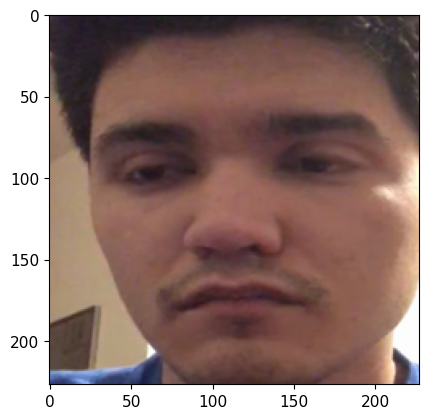

In [16]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [17]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()